In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [49]:
class AdalinePerceptron:

    def __init__(self, eta, epochs, log=False):
        self.eta = eta
        self.epochs = epochs
        self.log = log

    def get_activation(self, X):
        return np.dot(X, self.w)

    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X, ones, axis=1)
        return np.where(self.get_activation(X_1) > 0, 1, -1)

    def fit(self, X, y):
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X, ones, axis=1)
        self.w = np.random.random((X_1.shape[1]))
        list_of_errors = []
        
        for epoch in range(self.epochs):
            error = 0
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w

            if self.log:
                error = 1/2 * (np.square((y - activation)).sum())
                print(f"Epoch: {epoch+1}, error: {error}")
                list_of_errors.append(error)

        if self.log:
            plt.plot(range(self.epochs), list_of_errors)                

Epoch: 1, error: 163.30086412476
Epoch: 2, error: 47.87200984243422
Epoch: 3, error: 36.57694458470936
Epoch: 4, error: 29.81806423786585
Epoch: 5, error: 24.440835336020214
Epoch: 6, error: 20.11127486196935
Epoch: 7, error: 16.62359369396324
Epoch: 8, error: 13.813868916414469
Epoch: 9, error: 11.55013707397707
Epoch: 10, error: 9.726122924878934
Epoch: 11, error: 8.256237779223989
Epoch: 12, error: 7.071552812476866
Epoch: 13, error: 6.116556215108585
Epoch: 14, error: 5.346541565457438
Epoch: 15, error: 4.725504556848696
Epoch: 16, error: 4.224449127589482
Epoch: 17, error: 3.820023303410915
Epoch: 18, error: 3.493420573702947
Epoch: 19, error: 3.2294951152871585
Epoch: 20, error: 3.0160492382220445
Epoch: 21, error: 2.8432595305560304
Epoch: 22, error: 2.703214704224733
Epoch: 23, error: 2.589543399421827
Epoch: 24, error: 2.4971144369920717
Epoch: 25, error: 2.421795416811137
Epoch: 26, error: 2.360258305083497
Epoch: 27, error: 2.309822864147426
Epoch: 28, error: 2.2683305587285

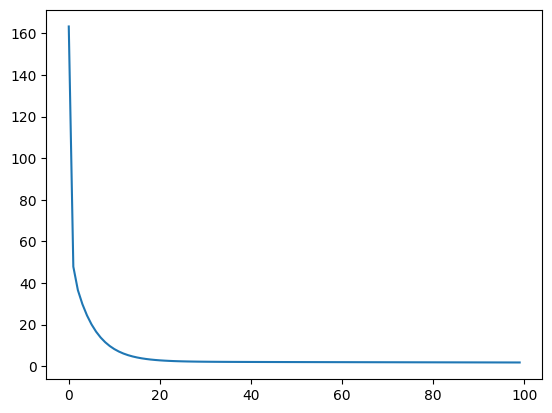

In [40]:
X = np.array([
    [2., 4.,  20.],  # 2*2 - 4*4 + 20 =   8 > 0
    [4., 3., -10.],  # 2*4 - 4*3 - 10 = -14 < 0
    [5., 6.,  13.],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5., 4.,   8.],  # 2*5 - 4*4 + 8 =    2 > 0
    [3., 4.,   5.],  # 2*3 - 4*4 + 5 =   -5 < 0 
])
 
y = np.array([1, -1, -1, 1, -1])
 
perceptron = AdalinePerceptron(eta=0.001, epochs=100, log=True)            
perceptron.fit(X, y)

In [47]:
df = pd.read_csv(r"../zasoby/iris.data", header = None)
df = df.iloc[:100, :].copy()
df[4] = df[4].apply(lambda x: 1 if x == 'Iris-setosa' else -1)
df
 
X = df.iloc[0:100, :-1].values
y = df[4].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Epoch: 1, error: 612.3510848728865
Epoch: 2, error: 572.0704037758674
Epoch: 3, error: 534.8589595528072
Epoch: 4, error: 500.48144480674125
Epoch: 5, error: 468.7205967089722
Epoch: 6, error: 439.3758132364845
Epoch: 7, error: 412.26187552437193
Epoch: 8, error: 387.20776819576076
Epoch: 9, error: 364.0555901557382
Epoch: 10, error: 342.659548911976
Epoch: 11, error: 322.88503201673666
Epoch: 12, error: 304.6077497161394
Epoch: 13, error: 287.712943346098
Epoch: 14, error: 272.09465443309193
Epoch: 15, error: 257.6550498445661
Epoch: 16, error: 244.3037986907479
Epoch: 17, error: 231.95749700927905
Epoch: 18, error: 220.53913656839606
Epoch: 19, error: 209.9776144053911
Epoch: 20, error: 200.20727997653324
Epoch: 21, error: 191.16751703418345
Epoch: 22, error: 182.8023575680186
Epoch: 23, error: 175.06012535150063
Epoch: 24, error: 167.8931068232879
Epoch: 25, error: 161.25724720738518
Epoch: 26, error: 155.11186993657765
Epoch: 27, error: 149.41941759211727
Epoch: 28, error: 144.1452

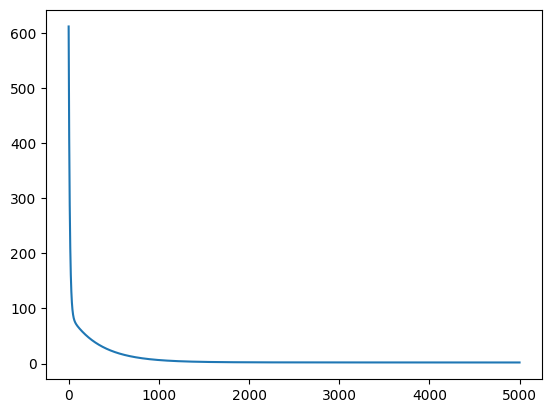

In [60]:
p = AdalinePerceptron(eta = 0.00001, epochs=5000, log=True) 
p.fit(X_train, y_train)   
             
y_pred = p.predict(X_test)
print(y_pred)